In [17]:
import pandas as pd 

# Input data files are available in the "input2" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("input2"))

['gender_submission.csv', 'test.csv', 'train.csv']


In [18]:
# Reading the data
df=pd.read_csv('input2/train.csv')
dft=pd.read_csv('input2/test.csv')

In [19]:
# Let's see what all data is there in our training dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
# And the data in our testing dataset
dft.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [21]:
df=df.fillna(0)
dft=dft.fillna(0)
df=df.replace(['male','female'],[0,1])
dft=dft.replace(['male','female'],[0,1])
df=df.drop(columns=['PassengerId'])
out_targets=dft['PassengerId'].values
cols=[i for i in df.describe()]
colt=[i for i in dft.describe()]
df_reduced=df[cols]
dft_red=dft[colt[1:]]
df_reduced.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [22]:
dft_red.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,34.5,0,0,7.8292
1,3,1,47.0,1,0,7.0000
2,2,0,62.0,0,0,9.6875
3,3,0,27.0,0,0,8.6625
4,3,1,22.0,1,1,12.2875


In [23]:
train_labels = df_reduced['Survived'].values
df_reduced=df_reduced.drop(columns=['Survived'])
train_data=df_reduced.values
test_data=dft_red.values
print(train_data.shape, train_labels.shape)
print(test_data.shape)

(891, 6) (891,)
(418, 6)


In [24]:
mean=train_data.mean(axis=0)
std=train_data.std(axis=0)
train_data-=mean
train_data/=std

meant=test_data.mean(axis=0)
stdt=test_data.std(axis=0)
test_data-=mean
test_data/=std

In [25]:
from keras import models, layers, optimizers

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_data, train_labels, test_size=0.20, shuffle=True)

In [27]:
print(x_train.shape, x_test.shape)


(712, 6) (179, 6)


In [28]:
index=200
x_val=x_train[:index]
y_val=y_train[:index]
partial_x_train = x_train[index:]
partial_y_train=y_train[index:]

In [29]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set_style('dark')

In [37]:
model = models.Sequential()
model.add(layers.Dense(10, activation='relu', input_shape=(6,)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(1, activation='sigmoid'))

In [38]:
sgd = optimizers.SGD(lr=0.001, decay=1e-6 ,momentum=0.9)
# adm = optimizers.Adam(lr=0.1, decay=1e-6)
model.compile(optimizer=sgd,
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [39]:
history = model.fit(partial_x_train, partial_y_train,
                   epochs=500,
                   batch_size=32,
                   validation_data=(x_val,y_val),
                   verbose=0)

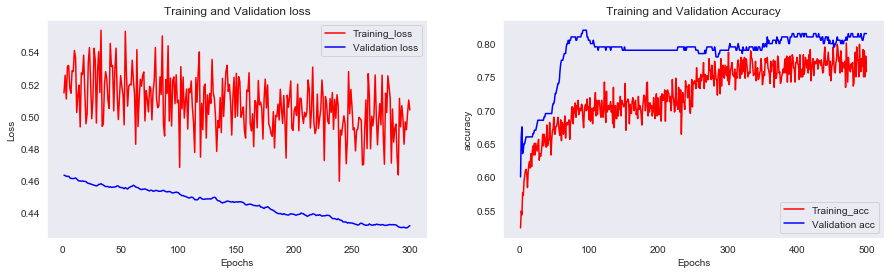

In [42]:
hist = history.history
acc=hist['accuracy']
a=200
b=len(acc)
val_loss=hist['val_loss'][a:b]
loss=hist['loss'][a:b]
val_acc=hist['val_accuracy']
epc = range(1,(b-a)+1)

plt.figure(figsize=(15,4))
plt.clf()
plt.subplot(1,2,1)
plt.plot(epc, loss, 'r', label='Training_loss')
plt.plot(epc, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

epc=range(1,len(acc)+1)
plt.subplot(1,2,2)
plt.plot(epc, acc, 'r', label='Training_acc')
plt.plot(epc, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()


plt.show()

In [43]:
model=models.Sequential()
model.add(layers.Dense(10, activation='relu', input_shape=(6,)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(1, activation='sigmoid'))

sgd = optimizers.SGD(lr=0.001, decay=1e-6 ,momentum=0.9)
# adm = optimizers.Adam(lr=0.1, decay=1e-6)
model.compile(optimizer=sgd,
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(train_data, train_labels,
                   epochs=500,
                   batch_size=32,
                   verbose=0)

In [44]:
results = model.evaluate(x_test, y_test)
results

179/179 [==============================] - 0s 607us/step


[0.47935647488306354, 0.7877094745635986]

In [45]:
predictions=model.predict(test_data)
# predictions
pred=[1 if predictions[i]>0.25 else 0 for i in range(len(test_data))]


In [46]:
pred

[0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,


In [47]:
res=pd.DataFrame()

In [48]:
pd.read_csv('input2/gender_submission.csv').head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [49]:
res['PassengerId']=out_targets
res['Survived']=pred
res.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [50]:
res.to_csv('Submission.csv', index=False)

In [51]:
res

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,1
8,900,1
9,901,0
